# Classificações Testes

In [1]:
import os
from os.path import join, dirname
from dotenv import load_dotenv

dotenv_path = join(dirname('__file__'), '.env')

load_dotenv(dotenv_path)

ROOT_PATH = os.environ.get("ROOT_PATH")


In [3]:
import pandas as pd

df = pd.read_parquet(f"{ROOT_PATH}/features/features.parquet")


In [4]:
df.columns

Index(['var', 'skew', 'kur', 'label', 'file'], dtype='object')

## Classificação


In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


def classifier(df):
    x = df.loc[:,['var', 'skew', 'kur']]
    y = df.loc[:, 'label']
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

    # tuned_parameters = {
    #     "kernel": ["rbf"], 
    #     "gamma": [1e-3, 1e-4], 
    #     "C": [1, 10, 100, 1000]
    # }

    # clf = GridSearchCV(SVC(), tuned_parameters, scoring='accuracy', n_jobs=-1)
    # clf.fit(X_train, y_train)
    # y_true, y_pred = y_test, clf.predict(X_test)

    # report = classification_report(y_true, y_pred, output_dict= True)

    # result = {
    #     'params':clf.best_params_,
    #     'report': report
    # }


    # return result    
    # means = clf.cv_results_["mean_test_score"]
    # stds = clf.cv_results_["std_test_score"]
    # for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    #     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    # print(clf.cv_results_.keys())
    model = SVC(kernel='rbf', probability=True, C=10, gamma=0.00001)
    # print(model.cv_results_.)

    clf = model.fit(X_train, y_train)

    pred_labels_tr = model.predict(X_train)
    pred_labels_te = model.predict(X_test)

    score_te, score_tr = model.score(X_test, y_test), model.score(X_train, y_train)

    result = {
        'features': x.columns,
        'test':{'accuracy':score_te},
        'train':{'accuracy':score_tr}
        }
    return result


In [9]:
classifier(df)

{'features': Index(['var', 'skew', 'kur'], dtype='object'),
 'test': {'accuracy': 0.9830985915492958},
 'train': {'accuracy': 0.9897779344377864}}

In [99]:
from pprint import pprint
import seaborn as sns
# for file in files:
# df = pd.read_parquet(f"{ROOT_PATH}{PROCESSED_DATA}ecg_features_select/{files[3]}")
df = pd.read_parquet('/mnt/c/Users/davi.nascimento/Documents/siena_eeg_ecg/data/processed/ecg_features_select/PN00-4.parquet')

for col in df.columns[:,:-1]:
    q75,q25 = np.percentile(df.loc[:,col],[75,25])
    intr_qr = q75-q25
    print(intr_qr)
# pprint(classifier(df))

# sns.boxplot(data=df, y='label', x= 'var_log_entropy', hue='label')


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<AxesSubplot:xlabel='energy_log_entropy', ylabel='label'>

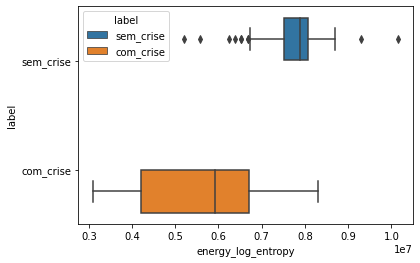

In [96]:
sns.boxplot(data=df, y='label', x= 'energy_log_entropy', hue='label')